In [1]:
import os.path

import numpy as np
from common.msi_parser import MsiParser
from common.pap_parser import PapParser
from common.pattern_data import PapPatternData, MsiData, PapData
from common.re_filter import ReFilter

import math
import matplotlib.pyplot as plt

plt.close("all")
import scipy
from IPython.display import display, Markdown, Latex

In [5]:
def plot_pattern(title: str, pattern: PapPatternData, ax: plt.Axes, color=None, clockwise: bool = False):
    r_min = -60
    r_clamp = -50
    linewidth = 2
    ang_deg = np.arange(pattern.start_angle, pattern.end_angle, pattern.step)
    ang = [float(a) * math.pi / 180 for a in ang_deg]

    ax.axhline(0, color='lightgray', linewidth=1.0)
    ax.axvline(0, color='lightgray', linewidth=1.0)
    r_max = 60 / math.sqrt(2)
    ax.plot([-r_max, r_max], [-r_max, r_max], color='lightgray', linewidth=1.0)
    ax.plot([-r_max, r_max], [r_max, -r_max], color='lightgray', linewidth=1.0)
    for r_i in [15, 30, 45, 60]:
        x = [r_i * math.cos(a_i) for a_i in ang]
        y = [r_i * math.sin(a_i) for a_i in ang]
        x.append(x[0])
        y.append(y[0])
        ax.plot(x, y, color='lightgray', linewidth=1.0)

    r = [max(r_clamp, float(g)) - r_min for g in pattern.gains.split(';')]
    x = []
    y = []
    for i, a_i in enumerate(ang):
        r_i = r[i]
        x_i = r_i * math.cos(a_i)
        y_i = r_i * math.sin(a_i)
        if clockwise:
            y_i = -y_i
        x.append(x_i)
        y.append(y_i)
    x.append(x[0])
    y.append(y[0])
    if color:
        ax.plot(x, y, color=color, linewidth=linewidth)
    else:
        ax.plot(x, y, linewidth=linewidth)
    # plot boresight line
    boresight_deg = pattern.get_boresight_deg()
    boresight = boresight_deg * math.pi / 180
    r = 60
    ax.plot(
        [0, r * math.cos(boresight)],
        [0, r * (-1 if clockwise else 1) * math.sin(boresight)],
        color='black',
        linewidth=2.0,
        linestyle='--'
    )
    ax.set_title(title + ' - Boresight: {:0.1f}°'.format(boresight_deg))


def plot_patterns(data: MsiData | PapData):
    fig, ax = plt.subplots(ncols=2, figsize=(10, 4.6))
    plot_pattern('H pattern', data.horiz_pap_pattern, ax[0], color='#228b22')
    plot_pattern('V pattern', data.vert_pap_pattern, ax[1], color='#ff0000', clockwise=True)
    plt.show()

In [6]:
def find_src_files(src_folder: str, src_file_re_filter: ReFilter):
    src_files = []

    for root, subdirs, files in os.walk(src_folder):
        for f in files:
            file_path = os.path.join(root[len(src_folder) + 1:], f)
            if src_file_re_filter.eval(file_path):
                src_files.append(file_path)
    return src_files

#### AQQY-Optimized-90degAzOp-n01-ap06-#6#2-Envelope_L1-SSB.pap

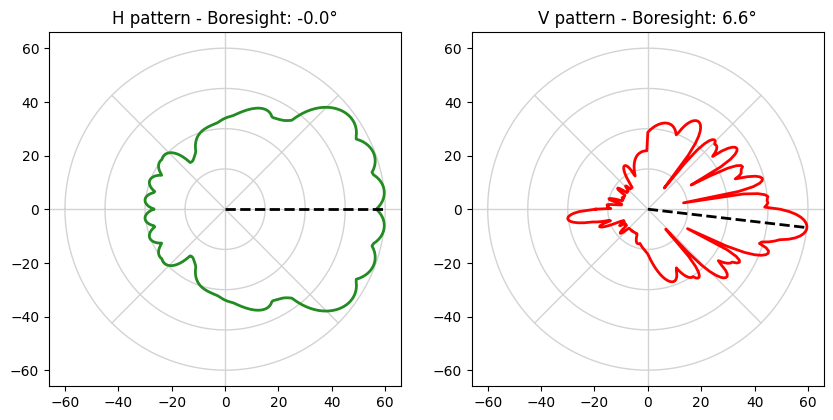

#### AQQY-Optimized-90degAzOp-n01-ap06-#6#2-SsbBeam-0371_L0.pap

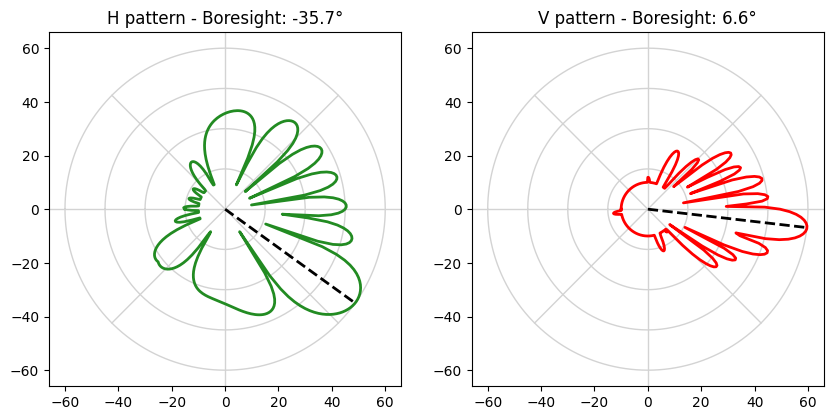

#### AQQY-Optimized-90degAzOp-n01-ap06-#6#2-SsbBeam-0376_L0.pap

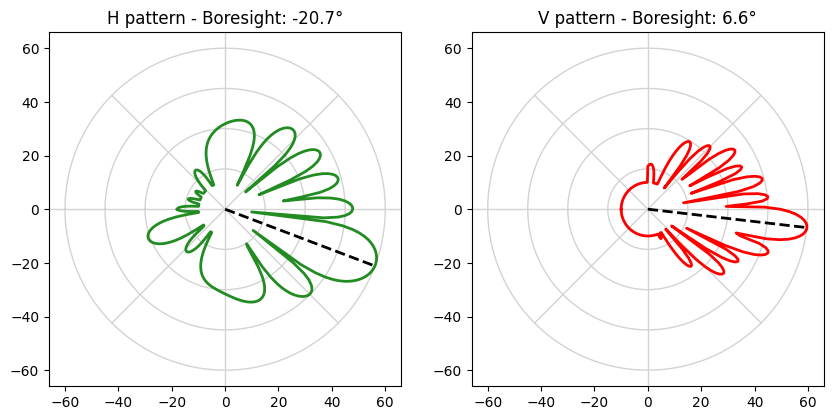

#### AQQY-Optimized-90degAzOp-n01-ap06-#6#2-SsbBeam-0381_L0.pap

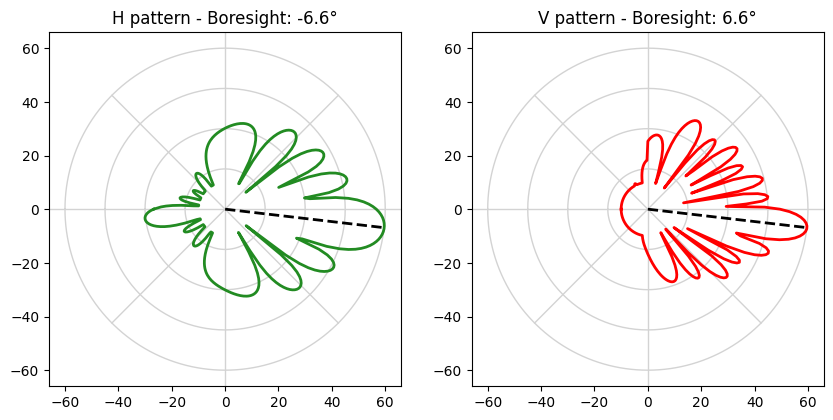

#### AQQY-Optimized-90degAzOp-n01-ap06-#6#2-SsbBeam-0386_L0.pap

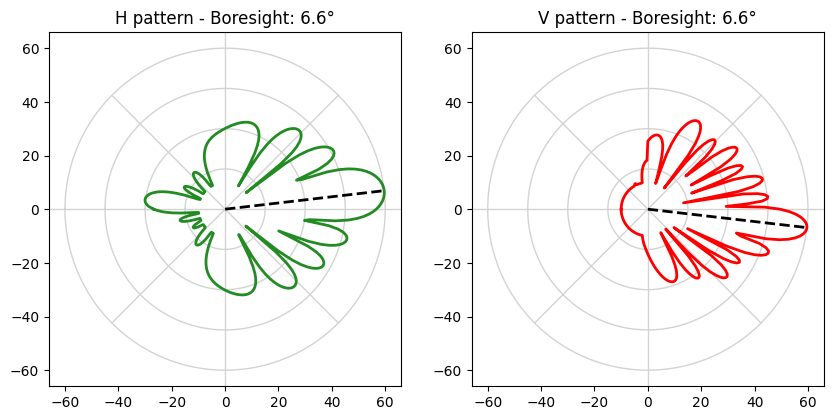

#### AQQY-Optimized-90degAzOp-n01-ap06-#6#2-SsbBeam-0391_L0.pap

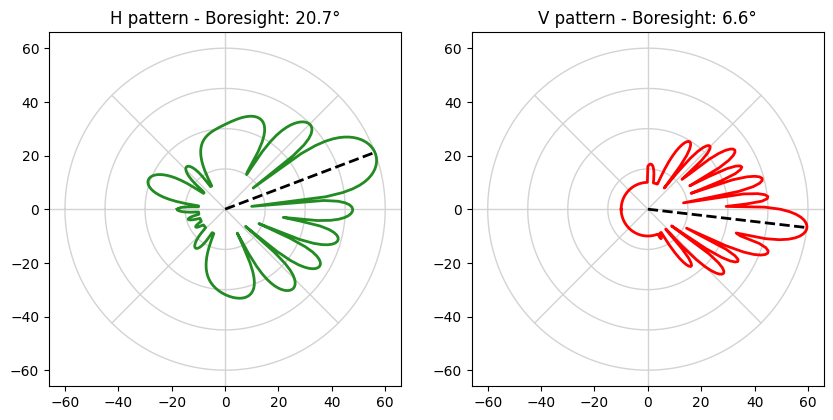

#### AQQY-Optimized-90degAzOp-n01-ap06-#6#2-SsbBeam-0396_L0.pap

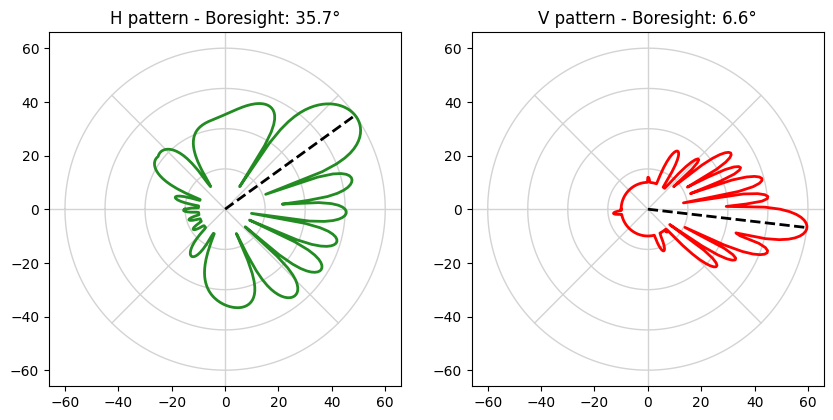

#### AQQY-Optimized-90degAzOp-n01-ap06-#6#2-SsbBeam-0401_L0.pap

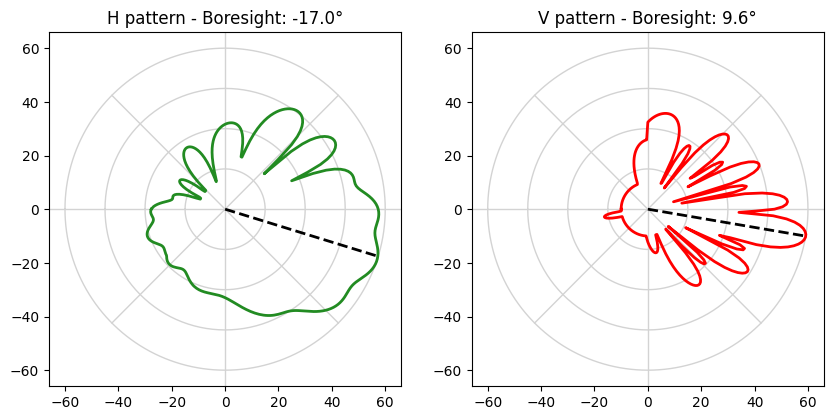

#### AQQY-Optimized-90degAzOp-n01-ap06-#6#2-SsbBeam-0406_L0.pap

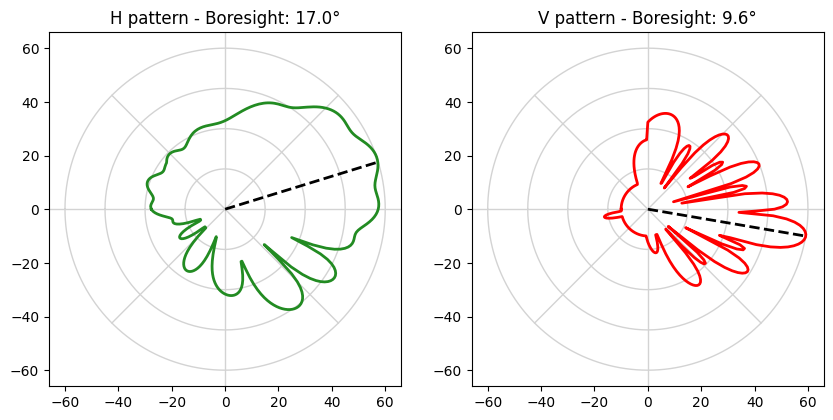

#### AQQY-Optimized-90degAzOp-n02-ap05-#6#2-Envelope_L1-SSB.pap

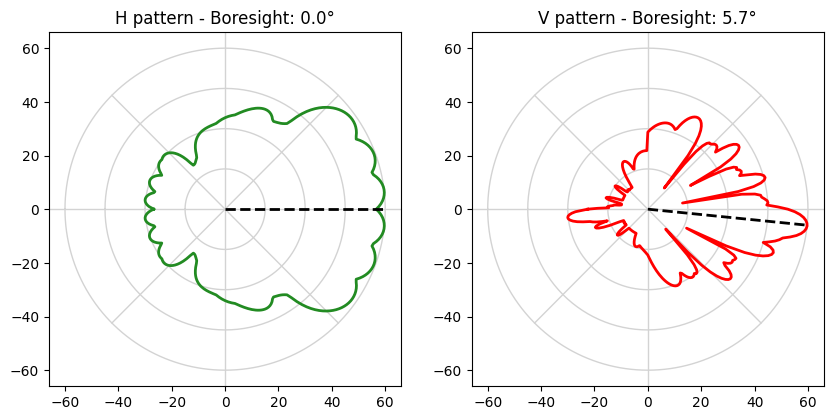

#### AQQY-Optimized-90degAzOp-n02-ap05-#6#2-SsbBeam-0371_L0.pap

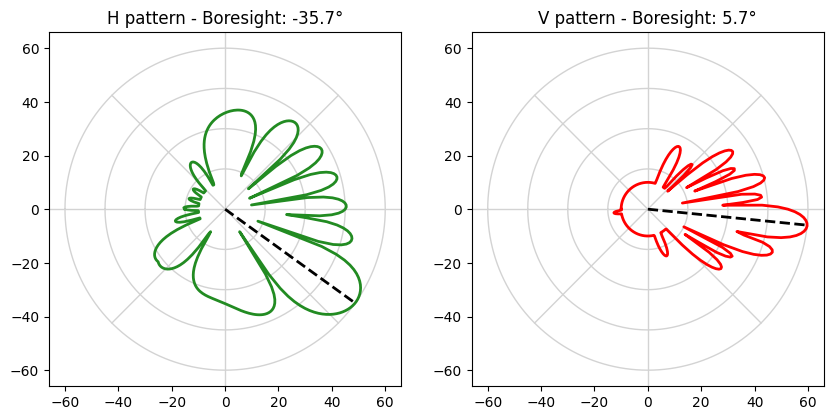

#### AQQY-Optimized-90degAzOp-n02-ap05-#6#2-SsbBeam-0376_L0.pap

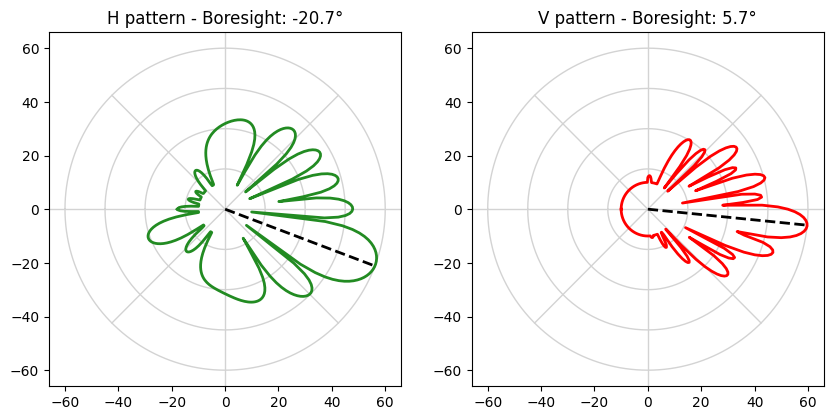

#### AQQY-Optimized-90degAzOp-n02-ap05-#6#2-SsbBeam-0381_L0.pap

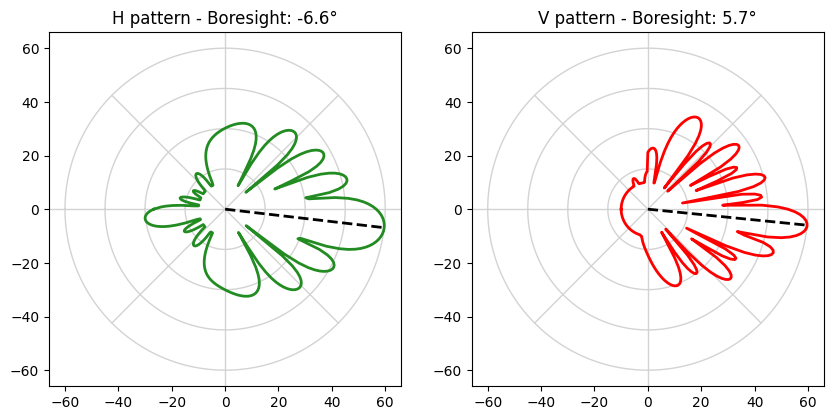

#### AQQY-Optimized-90degAzOp-n02-ap05-#6#2-SsbBeam-0386_L0.pap

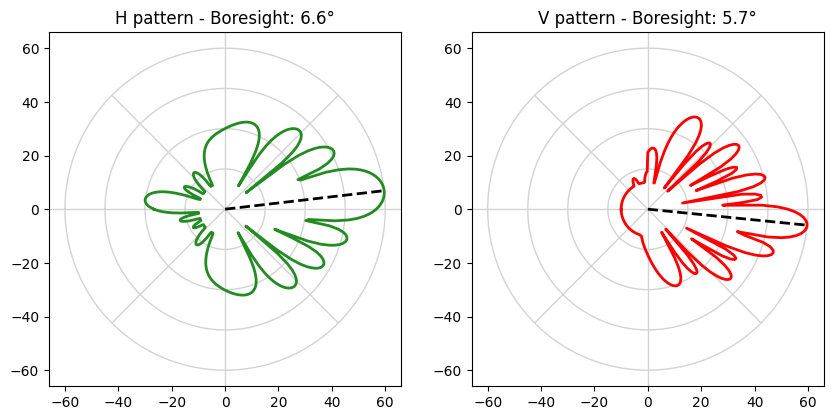

#### AQQY-Optimized-90degAzOp-n02-ap05-#6#2-SsbBeam-0391_L0.pap

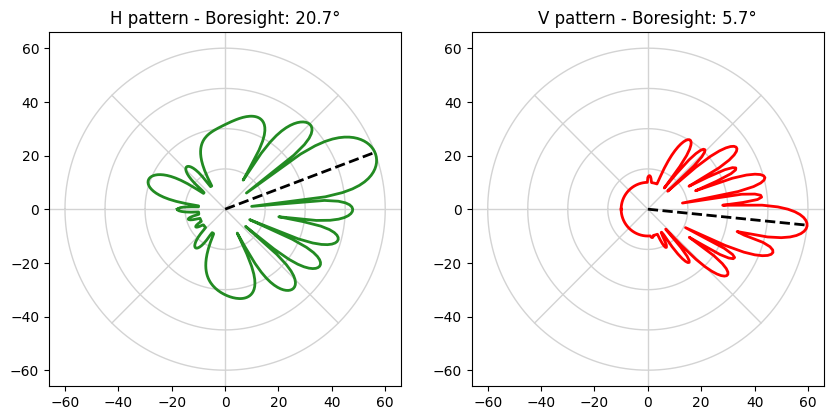

#### AQQY-Optimized-90degAzOp-n02-ap05-#6#2-SsbBeam-0396_L0.pap

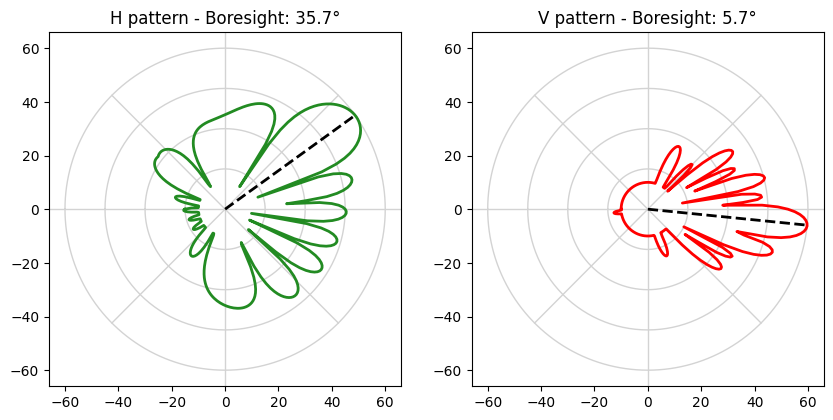

#### AQQY-Optimized-90degAzOp-n02-ap05-#6#2-SsbBeam-0401_L0.pap

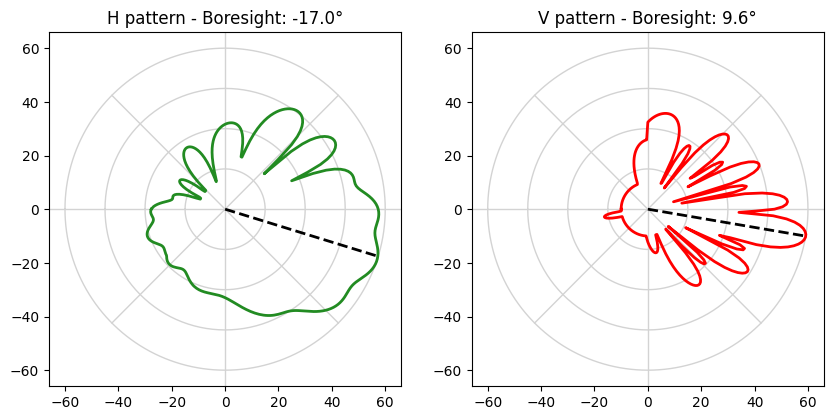

#### AQQY-Optimized-90degAzOp-n02-ap05-#6#2-SsbBeam-0406_L0.pap

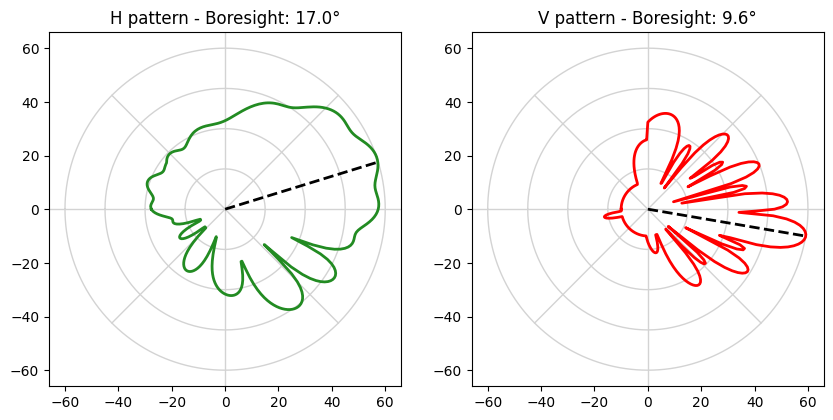

#### AQQY-Optimized-90degAzOp-n03-ap04-#6#2-Envelope_L1-SSB.pap

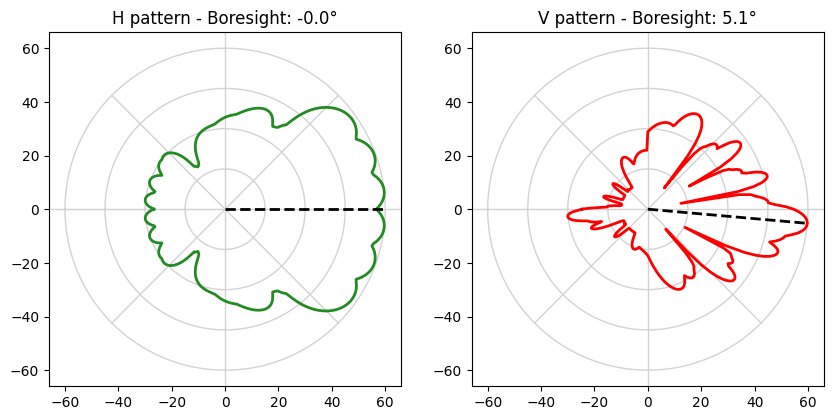

#### AQQY-Optimized-90degAzOp-n03-ap04-#6#2-SsbBeam-0371_L0.pap

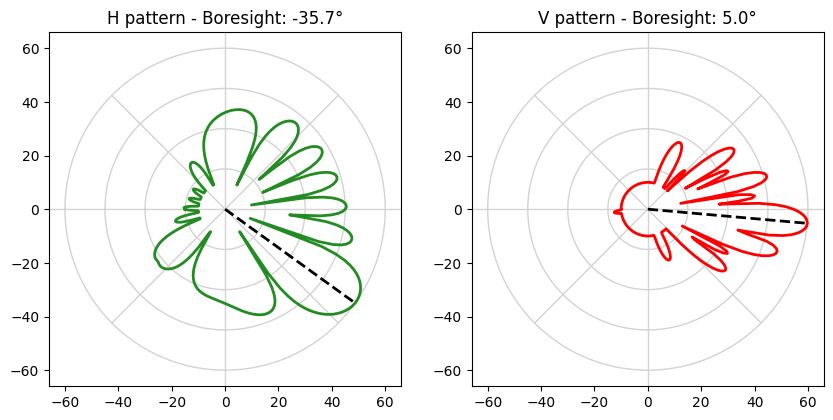

#### AQQY-Optimized-90degAzOp-n03-ap04-#6#2-SsbBeam-0376_L0.pap

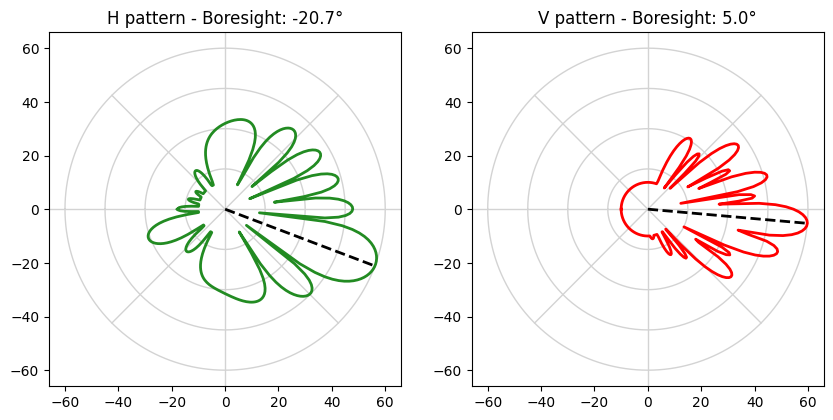

#### AQQY-Optimized-90degAzOp-n03-ap04-#6#2-SsbBeam-0381_L0.pap

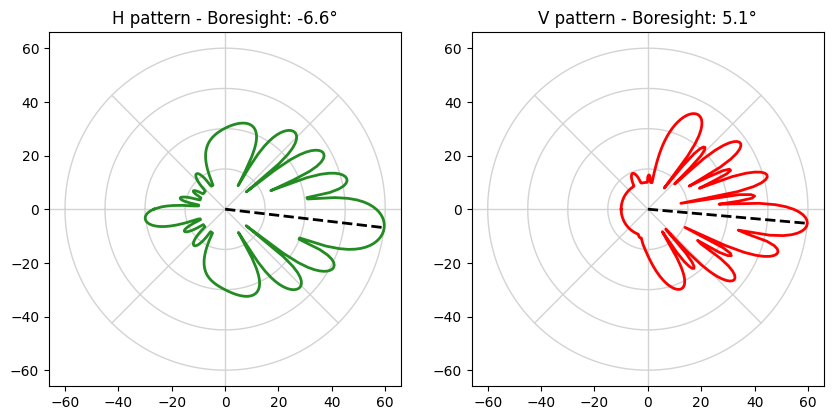

#### AQQY-Optimized-90degAzOp-n03-ap04-#6#2-SsbBeam-0386_L0.pap

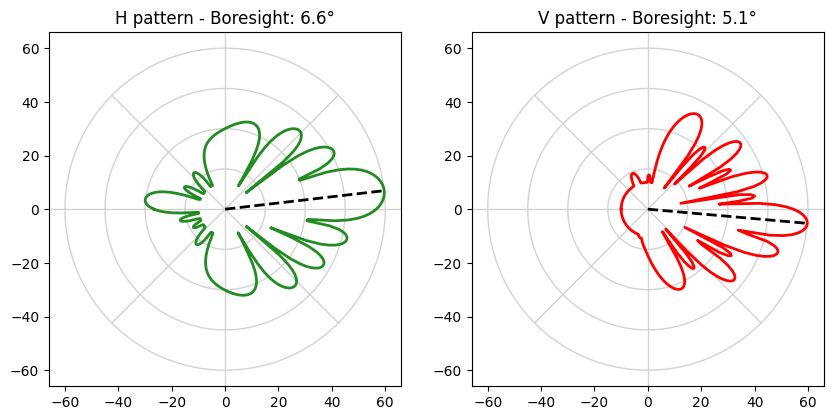

#### AQQY-Optimized-90degAzOp-n03-ap04-#6#2-SsbBeam-0391_L0.pap

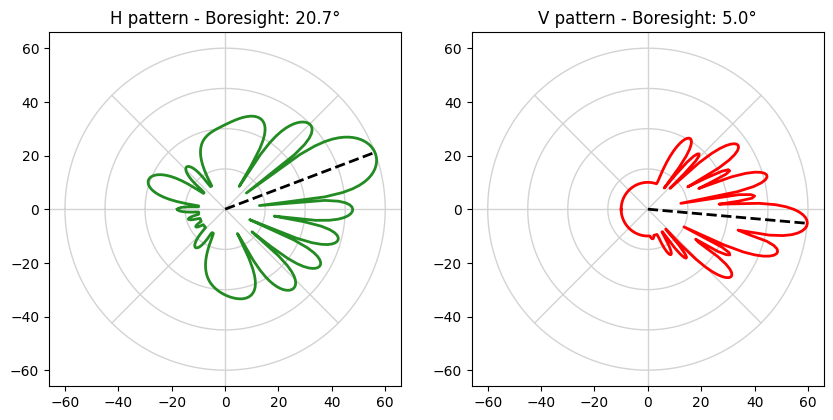

#### AQQY-Optimized-90degAzOp-n03-ap04-#6#2-SsbBeam-0396_L0.pap

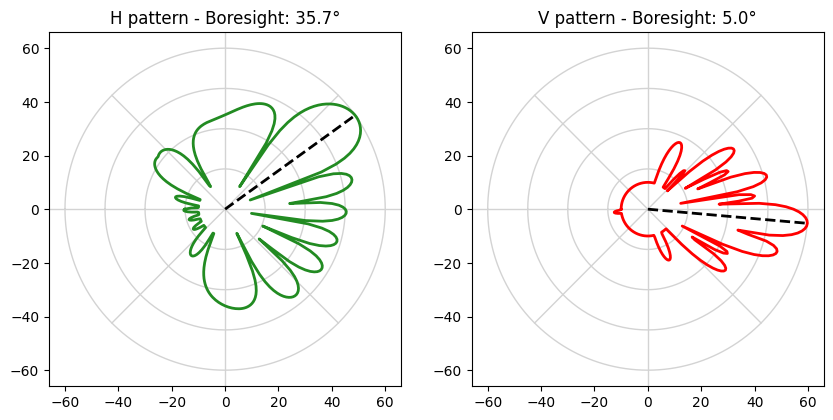

#### AQQY-Optimized-90degAzOp-n03-ap04-#6#2-SsbBeam-0401_L0.pap

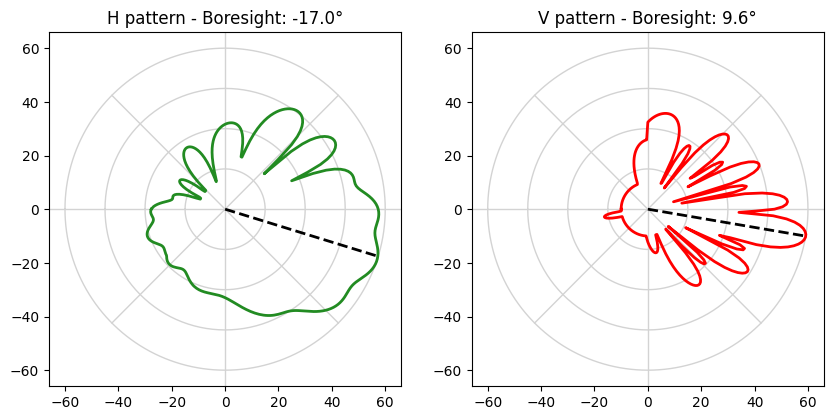

#### AQQY-Optimized-90degAzOp-n03-ap04-#6#2-SsbBeam-0406_L0.pap

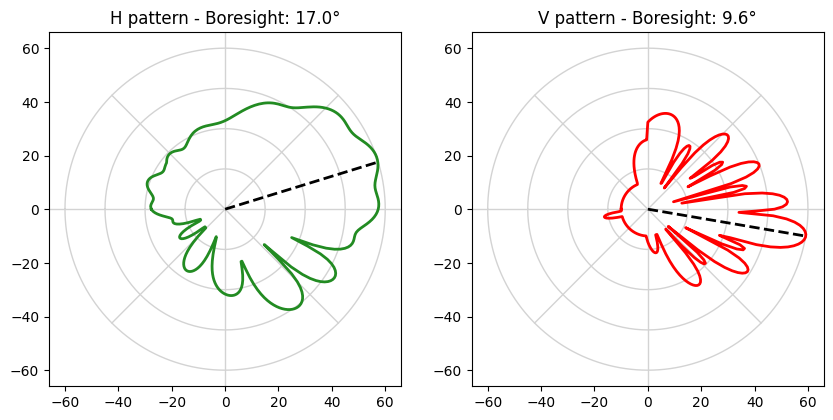

#### AQQY-Optimized-90degAzOp-p00-ap07-#6#2-Envelope_L1-SSB.pap

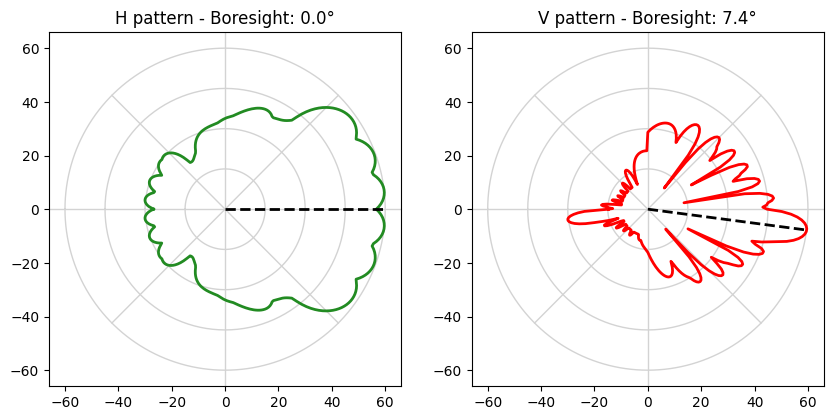

#### AQQY-Optimized-90degAzOp-p00-ap07-#6#2-SsbBeam-0371_L0.pap

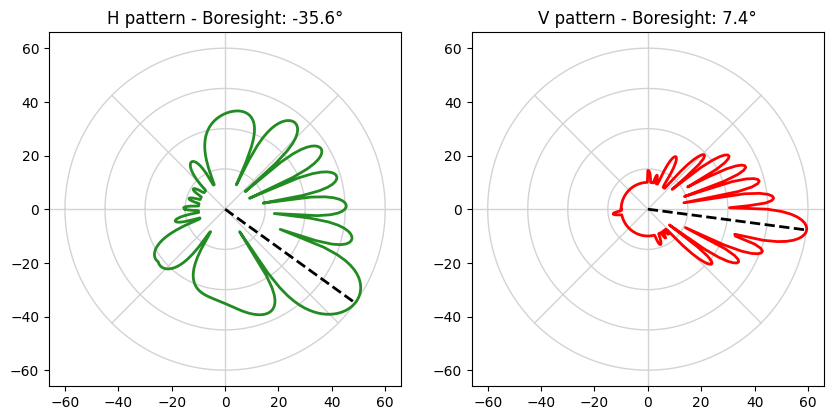

#### AQQY-Optimized-90degAzOp-p00-ap07-#6#2-SsbBeam-0376_L0.pap

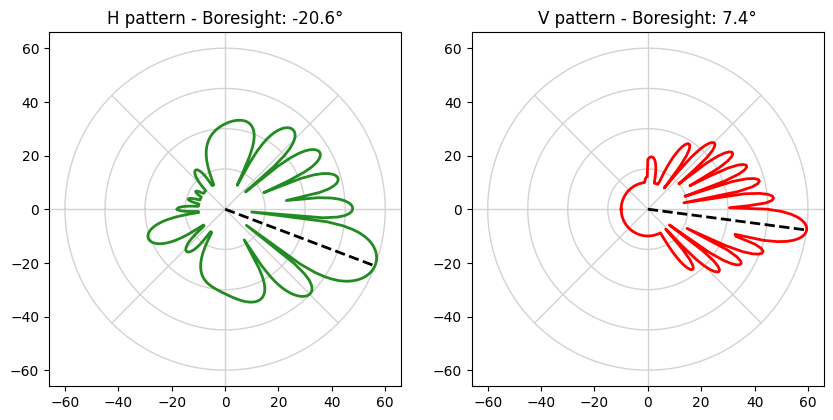

#### AQQY-Optimized-90degAzOp-p00-ap07-#6#2-SsbBeam-0381_L0.pap

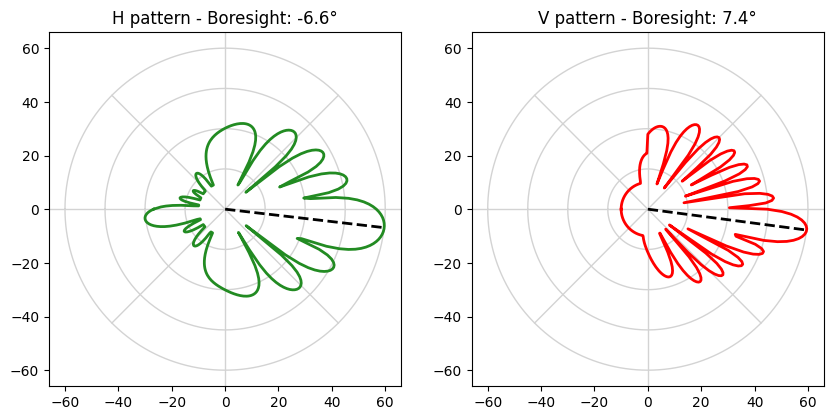

#### AQQY-Optimized-90degAzOp-p00-ap07-#6#2-SsbBeam-0386_L0.pap

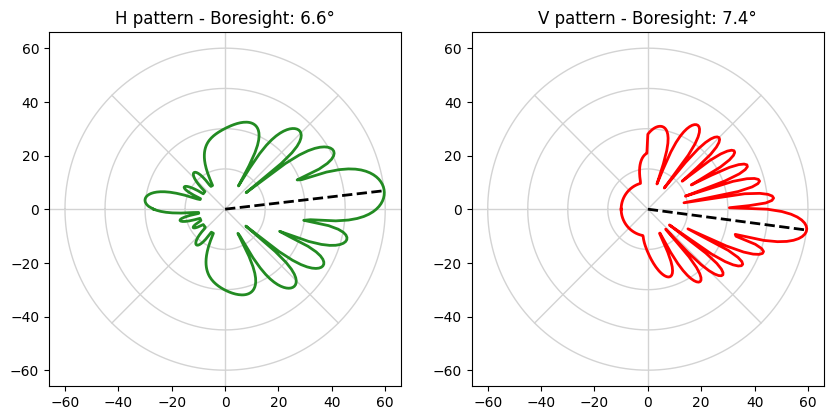

#### AQQY-Optimized-90degAzOp-p00-ap07-#6#2-SsbBeam-0391_L0.pap

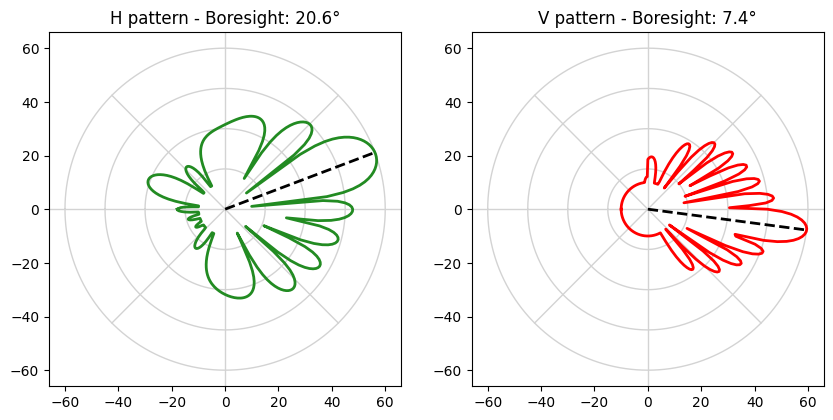

#### AQQY-Optimized-90degAzOp-p00-ap07-#6#2-SsbBeam-0396_L0.pap

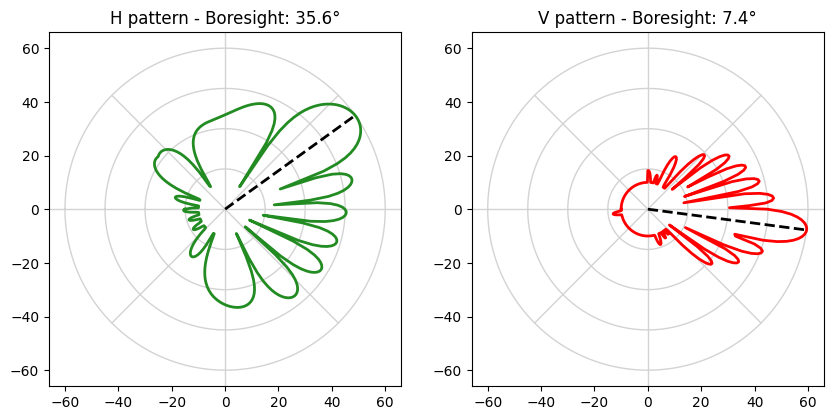

#### AQQY-Optimized-90degAzOp-p00-ap07-#6#2-SsbBeam-0401_L0.pap

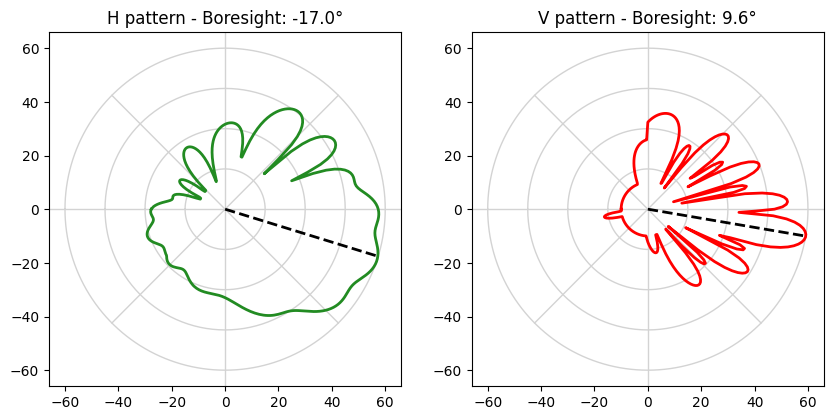

#### AQQY-Optimized-90degAzOp-p00-ap07-#6#2-SsbBeam-0406_L0.pap

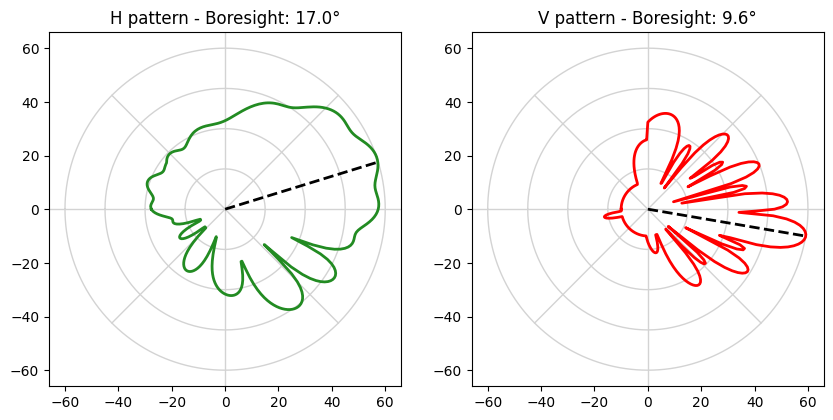

In [7]:
# base_folder = 'D:\\Cell Planning\\Antenna model processing\\Library\\mMIMO\\mMIMO Antennas\\Huawei\\AAU5645 3.5G_MSI'
base_folder = 'D:\\Cell Planning\\Antenna model processing\\Library\\mMIMO\\mMIMO Antennas\\Nokia\\AQQY-90BW#6#2\\pafx contents'
src_files = find_src_files(
    base_folder,
    ReFilter(allow=['.*\.msi', '.*\.pap'], deny=['.*Tapering.*'])
)
msi_parser = MsiParser()
pap_parser = PapParser()
for src_file in src_files:
    display(Markdown(f"#### {src_file}"))
    if src_file.lower().endswith('.msi'):
        payload = msi_parser.parse(base_folder + '\\' + src_file)
    elif src_file.lower().endswith('.pap'):
        payload = pap_parser.parse(base_folder + '\\' + src_file)
    else:
        continue
    plot_patterns(payload)